# Загрузка данных

1. Загрузить датасет по ссылке: https://www.kaggle.com/acostasg/random-shopping-cart .
Данные представлены в виде csv таблицы. Данные представляют собой информацию о том,
какой покупатель что и когда покупал. В данной лаб. работе не будем использовать данные
о дате покупки.

2. Создать Python скрипт. Загрузить данные в датафрейм.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
all_data = pd.read_csv('dataset_group.csv',header=None)
# В файле нет строки с названием столбцов, поэтому параметр header равен None.
# Интерес представляет информация об id покупателя - столбец с названием 1
# Название купленного товара хранится в столбце с названием 2

3. Получим список всех id покупателей, которые есть в файле

In [50]:
unique_id = list(set(all_data[1]))
print(len(unique_id)) #Выведем количество id

1139


4. Получим список всех товаров, которые есть в файле

In [51]:
items = list(set(all_data[2]))
print(len(items)) #Выведем количество товаров

38


5. Далее необходимо сформировать датасет подходящий для частотного анализа. Для этого
надо слить все товары одного покупателя в один список. Для дальнейшего частотного
анализа id покупателя будет не нужен

In [52]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

# Подготовка данных

1. Так как полученные датасет не пригоден для анализа напрямую, так как каждый список
пользователя может содержать разное количество товаров. Поэтому данные надо
закодировать так, чтобы их можно было представить в виде матрицы. Для кодированния
данных используем TransactionEncoder

In [53]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

2. Выведите полученный dataframe и объясните, как стали представляться данные

In [54]:
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


# Ассоциативный анализ с использованием алгоритма Apriori

1. Применим алгоритм apriori с минимальным уровнем поддержки 0.3

In [55]:
from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


Объясните полученный результат

2. Применим алгоритм apriori с тем же уровнем поддержки, но ограничим максимальный
размер набора единицей

In [56]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


3. Применим алгоритм apriori и выведем только те наборы, которые имеют размер 2, а также
количество таких наборов

In [57]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print('\nCount of result itemsets = ',len(results))
results


Count of result itemsets =  14


,support,itemsets,length
38,0.310799,"(aluminum foil, vegetables)",2
39,0.300263,"(vegetables, bagels)",2
40,0.310799,"(vegetables, cereals)",2
41,0.309043,"(vegetables, cheeses)",2
42,0.308165,"(dinner rolls, vegetables)",2
43,0.306409,"(vegetables, dishwashing liquid/detergent)",2
44,0.326602,"(vegetables, eggs)",2
45,0.302897,"(vegetables, ice cream)",2
46,0.309043,"(vegetables, laundry detergent)",2
47,0.311677,"(vegetables, lunch meat)",2


4. Посчитайте количество наборов при различных уровнях поддержки. Начальное значение
поддержки 0.05, шаг 0.01. Постройте график зависимости количества наборов от уровня
поддержки

In [58]:
support_range = np.arange(0.05, 1, 0.01)
count = []
for support in support_range:
    count.append(len(apriori(df, min_support=support)))

# plt.plot(support_range, size)
# plt.show()

5. Определите значение уровня поддержки при котором перестают генерироваться наборы
размера 1,2,3, и.т.д. Отметьте полученные уровне поддержки на графике построенном в
пункте 4

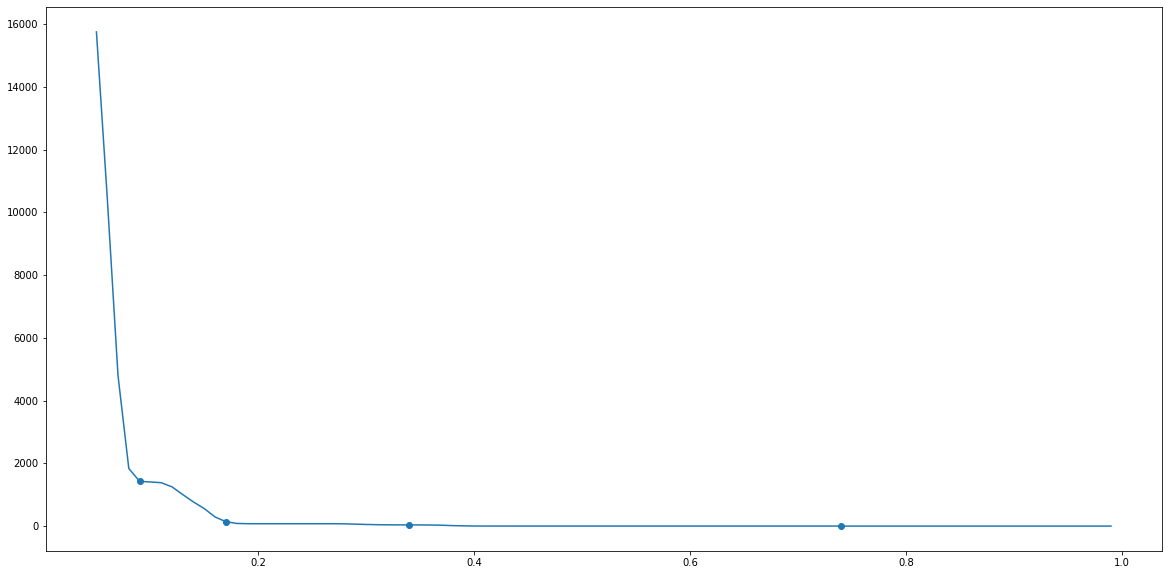

In [59]:
support_range = np.arange(0.05, 1, 0.01)
k = None
border = pd.Series(dtype='float64')
for support in support_range:
    results = apriori(df, min_support=support)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    if k is None:
        k = max(results['length'])
    else:
        while k > 0 and len(results[results['length'] == k]) == 0:
            border[support] = len(results)
            k -= 1
            
plt.figure(figsize=(20,10))
plt.scatter(border.index, border)
plt.plot(support_range, count)
plt.show()

6. Построим датасет только из тех элементов, которые попадают в наборы размером 1 при
уровне поддержки 0.38

In [60]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
new_items] for id in unique_id]

7. Приведите полученный датасет к формату, который можно обработать

In [61]:
te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df_new = pd.DataFrame(te_ary, columns=te.columns_)

8. Проведите ассоциативный анализ при уровне поддержки 0.3 для нового датасета. Опишите
в чем сходства и различия

In [62]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [47]:
results = apriori(df_new, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.384548,(aluminum foil),1
1,0.385426,(bagels),1
2,0.395961,(cereals),1
3,0.390694,(cheeses),1
4,0.388938,(dinner rolls),1
5,0.388060,(dishwashing liquid/detergent),1
6,0.389816,(eggs),1
7,0.398595,(ice cream),1
8,0.395083,(lunch meat),1
9,0.380158,(milk),1


9. Проведите ассоциативный анализ при уровне поддержки 0.15 для нового датасета.
Выведите все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [64]:
results = apriori(df_new, min_support=0.15, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results['contains'] = results['itemsets'].apply(lambda x: 'yogurt' in x or 'waffles' in x)
results[results['contains'] == True][results['length'] > 1]

<ipython-input-64-f4797ba9e19c>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  results[results['contains'] == True][results['length'] > 1]


,support,itemsets,length,contains
27,0.169447,"(aluminum foil, waffles)",2,True
28,0.177349,"(aluminum foil, yogurt)",2,True
40,0.159789,"(bagels, waffles)",2,True
41,0.162423,"(yogurt, bagels)",2,True
52,0.160667,"(cereals, waffles)",2,True
53,0.172081,"(yogurt, cereals)",2,True
63,0.172959,"(cheeses, waffles)",2,True
64,0.172081,"(cheeses, yogurt)",2,True
73,0.169447,"(dinner rolls, waffles)",2,True
74,0.166813,"(dinner rolls, yogurt)",2,True


10. Постройте датасет, из тех элементов, которые не попали в датасет в п. 6 и приведите его к
удобному для анализа виду

In [66]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]

rest_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem not in new_items] for id in unique_id]

te = TransactionEncoder()
te_ary = te.fit(rest_dataset).transform(rest_dataset)
df_rest = pd.DataFrame(te_ary, columns=te.columns_)

11. Проведите анализ aprioti для полученного датасета

In [67]:
results = apriori(df_rest, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.374890,(beef),1
2,0.367867,(butter),1
3,0.379280,(coffee/tea),1
4,0.352941,(flour),1
5,0.370500,(fruits),1
6,0.345917,(hand soap),1
7,0.375768,(individual meals),1
8,0.376646,(juice),1
9,0.371378,(ketchup),1


In [75]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(df, min_support=0.1, use_colnames=True)

12. Напишите правило, для вывода всех наборов, в которых хотя бы два элемента начинаются
на 's

In [76]:
results['two_s'] = results['itemsets'].apply(lambda x: len([s for s in x if s[0] == 's']) >= 2)
results[results['two_s'] == True]

,support,itemsets,two_s
675,0.137840,"(sandwich loaves, sandwich bags)",True
676,0.146620,"(shampoo, sandwich bags)",True
677,0.158911,"(sandwich bags, soap)",True
678,0.162423,"(sandwich bags, soda)",True
679,0.147498,"(sandwich bags, spaghetti sauce)",True
680,0.131694,"(sugar, sandwich bags)",True
686,0.150132,"(sandwich loaves, shampoo)",True
687,0.158033,"(sandwich loaves, soap)",True
688,0.141352,"(sandwich loaves, soda)",True
689,0.150132,"(sandwich loaves, spaghetti sauce)",True


13. Напишите правило, для вывода всех наборов, для которых уровень поддержки изменяется
от 0.1 до 0.25

In [77]:
results['in_supp_range'] = results['support'].apply(lambda x: 0.1 <= x <= 0.25)
results[results['in_supp_range'] == True]

,support,itemsets,two_s,in_supp_range
38,0.157155,"(aluminum foil, all- purpose)",False,True
39,0.150132,"(all- purpose, bagels)",False,True
40,0.144864,"(all- purpose, beef)",False,True
41,0.147498,"(all- purpose, butter)",False,True
42,0.151010,"(all- purpose, cereals)",False,True
...,...,...,...,...
1401,0.135206,"(vegetables, toilet paper, waffles)",False,True
1402,0.130817,"(vegetables, yogurt, toilet paper)",False,True
1403,0.121159,"(vegetables, waffles, tortillas)",False,True
1404,0.130817,"(vegetables, yogurt, tortillas)",False,True


In [73]:
results['in_supp_range'] = results['support'].apply(lambda x: 0.1 <= x <= 0.25)
results[results['in_supp_range'] == True]

       support                             itemsets  two_s  in_supp_range
38    0.157155        (aluminum foil, all- purpose)  False           True
39    0.150132               (all- purpose, bagels)  False           True
40    0.144864                 (all- purpose, beef)  False           True
41    0.147498               (all- purpose, butter)  False           True
42    0.151010              (all- purpose, cereals)  False           True
...        ...                                  ...    ...            ...
1401  0.135206  (vegetables, toilet paper, waffles)  False           True
1402  0.130817   (vegetables, yogurt, toilet paper)  False           True
1403  0.121159     (vegetables, waffles, tortillas)  False           True
1404  0.130817      (vegetables, yogurt, tortillas)  False           True
1405  0.146620        (vegetables, yogurt, waffles)  False           True

[1331 rows x 4 columns]
